<h1 align="center"><font color="yellow">DeepLearning.AI: Embeddings</font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [cohere](https://docs.cohere.com/reference/embed)

# <font color="red">Setup</font>

In [ ]:
#%pip install cohere umap-learn altair datasets

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [2]:
import cohere
co = cohere.Client(os.environ['COHERE_API_KEY'])

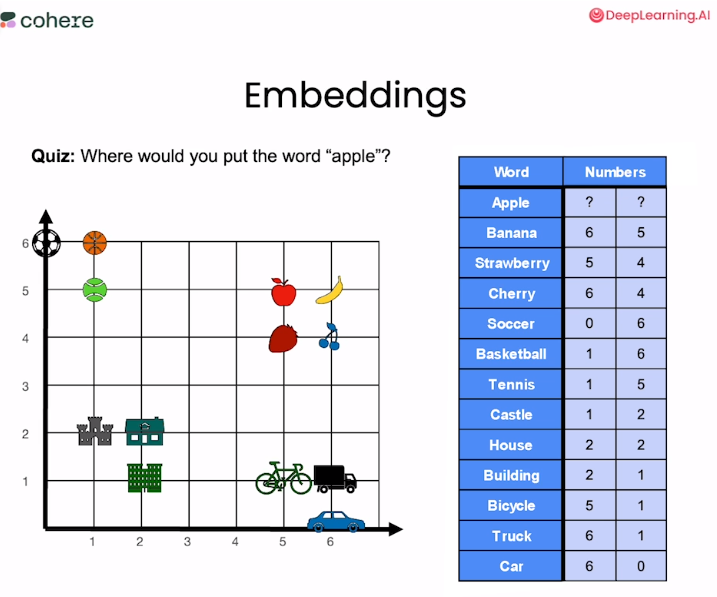

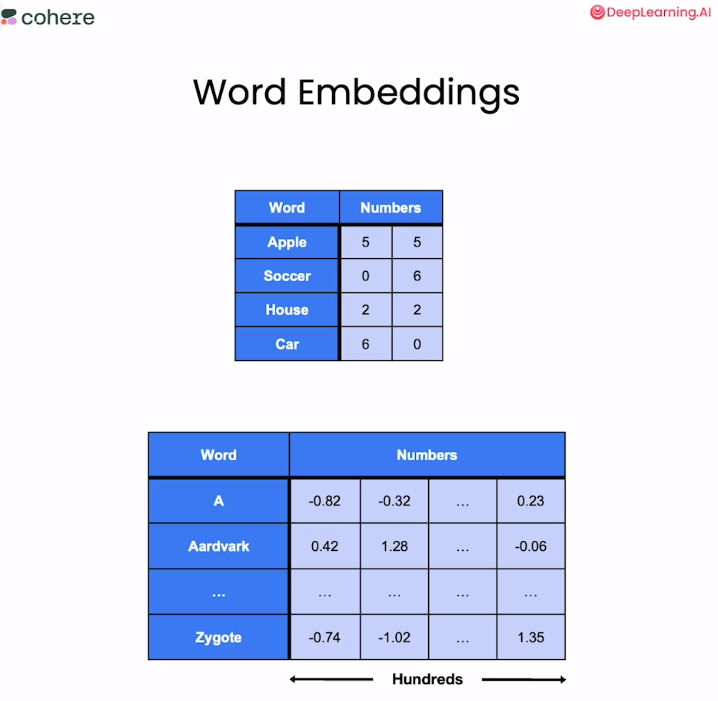

# <font color="red">Word Embeddings</font>

<font color="orange">Considere um conjunto de dados muito pequeno de três palavras.</font>

In [3]:
import pandas as pd


three_words = pd.DataFrame({'text':['joy', 'happiness', 'potato']})

three_words

,text
0,joy
1,happiness
2,potato


<font color="orange">Vamos criar os embeddings para as três palavras:</font>

In [4]:
three_words_emb = co.embed(texts=list(three_words['text']), model='embed-english-v2.0').embeddings

In [5]:
word_1 = three_words_emb[0]
word_2 = three_words_emb[1]
word_3 = three_words_emb[2]

In [6]:
len(word_1)

4096

In [7]:
# Printamos alguns valores do Embeddings:
word_1[:10]

[2.3203125,
 -0.18334961,
 -0.578125,
 -0.7314453,
 -2.2050781,
 -2.59375,
 0.35205078,
 -1.6220703,
 0.27954102,
 0.3083496]

# <font color="red">Sentence Embeddings</font>

Considere um conjunto de dados muito pequeno de três frases.

In [8]:
sentences = pd.DataFrame({'text':['Where is the world cup?',
                                  'The world cup is in Qatar',
                                  'What color is the sky?',
                                  'The sky is blue',
                                  'Where does the bear live?',
                                  'The bear lives in the the woods',
                                  'What is an apple?',
                                  'An apple is a fruit',]})


sentences

,text
0,Where is the world cup?
1,The world cup is in Qatar
2,What color is the sky?
3,The sky is blue
4,Where does the bear live?
5,The bear lives in the the woods
6,What is an apple?
7,An apple is a fruit


<font color="orange">Vamos criar os embeddings para as três frases:</font>

In [9]:
emb = co.embed(texts=list(sentences['text']), model='embed-english-v2.0').embeddings

# Explore the 10 first entries of the embeddings of the 3 sentences:
for e in emb:
    print(e[:3])

[0.27319336, -0.37768555, -1.0273438]
[0.49804688, 1.2236328, 0.4074707]
[-0.23571777, -0.9375, 0.9614258]
[0.08300781, -0.32080078, 0.9272461]
[0.49780273, -0.35058594, -1.6171875]
[1.2294922, -1.3779297, -1.8378906]
[0.15686035, -0.92041016, 1.5996094]
[1.0761719, -0.7211914, 0.9296875]


In [10]:
len(emb[0])

4096

## Usando `UMAP`

In [11]:
import umap 
import altair as alt

import warnings
warnings.filterwarnings('ignore')

def umap_plot(sentences, emb):
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(emb)
    
    df = pd.DataFrame({'x': embedding[:, 0], 'y': embedding[:, 1], 'sentence': sentences['text']})
    
    chart = alt.Chart(df).mark_circle().encode(
        x='x',
        y='y',
        tooltip=['x', 'y', 'sentence']
    ).interactive()
    
    return chart




chart = umap_plot(sentences, emb)
chart.show()


alt.Chart(...)

## Usando `TSNE`

In [12]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE  # Importe a classe TSNE do scikit-learn

def tsne_plot(sentences, emb):
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Ajuste a perplexity conforme necessário
    
    # Converta emb para uma matriz numpy
    emb_matrix = np.array(emb)
    
    embedding = tsne.fit_transform(emb_matrix)
    
    df = pd.DataFrame({'x': embedding[:, 0], 'y': embedding[:, 1], 'sentence': sentences['text']})
    
    chart = alt.Chart(df).mark_circle().encode(
        x='x',
        y='y',
        tooltip=['x', 'y', 'sentence']
    ).interactive()
    
    return chart



chart = tsne_plot(sentences, emb)
chart.show()



alt.Chart(...)